In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
eval_loss_df = pd.read_csv('eval_loss.csv')
train_loss_df = pd.read_csv('train_loss.csv')
eval_blue = pd.read_csv('eval_blue_4.csv')
eval_ppl = pd.read_csv('eval_ppl.csv')

In [3]:
eval_loss_df.head()

,Step,go-20231026_131658 - eval_loss,go-20231026_131658 - eval_loss__MIN,go-20231026_131658 - eval_loss__MAX,ruby-20231025_235507 - eval_loss,ruby-20231025_235507 - eval_loss__MIN,ruby-20231025_235507 - eval_loss__MAX,javascript-20231025_172654 - eval_loss,javascript-20231025_172654 - eval_loss__MIN,javascript-20231025_172654 - eval_loss__MAX,java-20231025_112721 - eval_loss,java-20231025_112721 - eval_loss__MIN,java-20231025_112721 - eval_loss__MAX,php-20231016_001159 - eval_loss,php-20231016_001159 - eval_loss__MIN,php-20231016_001159 - eval_loss__MAX,python-20231015_143112 - eval_loss,python-20231015_143112 - eval_loss__MIN,python-20231015_143112 - eval_loss__MAX
0,644,3.94522,3.94522,3.94522,3.94961,3.94961,3.94961,3.94680,3.94680,3.94680,3.94562,3.94562,3.94562,NaN,NaN,NaN,NaN,NaN,NaN
1,942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.57025,3.57025,3.57025,NaN,NaN,NaN
2,983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.17673,4.17673,4.17673
3,1288,3.47628,3.47628,3.47628,3.48136,3.48136,3.48136,3.47444,3.47444,3.47444,3.47649,3.47649,3.47649,NaN,NaN,NaN,NaN,NaN,NaN
4,1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.14453,3.14453,3.14453,NaN,NaN,NaN


In [8]:
# non null count
eval_loss_df.notna().sum()

Step                                           30
go-20231026_131658 - eval_loss                 10
go-20231026_131658 - eval_loss__MIN            10
go-20231026_131658 - eval_loss__MAX            10
ruby-20231025_235507 - eval_loss               10
ruby-20231025_235507 - eval_loss__MIN          10
ruby-20231025_235507 - eval_loss__MAX          10
javascript-20231025_172654 - eval_loss         10
javascript-20231025_172654 - eval_loss__MIN    10
javascript-20231025_172654 - eval_loss__MAX    10
java-20231025_112721 - eval_loss               10
java-20231025_112721 - eval_loss__MIN          10
java-20231025_112721 - eval_loss__MAX          10
php-20231016_001159 - eval_loss                10
php-20231016_001159 - eval_loss__MIN           10
php-20231016_001159 - eval_loss__MAX           10
python-20231015_143112 - eval_loss             10
python-20231015_143112 - eval_loss__MIN        10
python-20231015_143112 - eval_loss__MAX        10
dtype: int64

In [4]:
train_loss_df.head()

,Step,go-20231026_131658 - train_loss,go-20231026_131658 - train_loss__MIN,go-20231026_131658 - train_loss__MAX,ruby-20231025_235507 - train_loss,ruby-20231025_235507 - train_loss__MIN,ruby-20231025_235507 - train_loss__MAX,javascript-20231025_172654 - train_loss,javascript-20231025_172654 - train_loss__MIN,javascript-20231025_172654 - train_loss__MAX,java-20231025_112721 - train_loss,java-20231025_112721 - train_loss__MIN,java-20231025_112721 - train_loss__MAX,php-20231016_001159 - train_loss,php-20231016_001159 - train_loss__MIN,php-20231016_001159 - train_loss__MAX,python-20231015_143112 - train_loss,python-20231015_143112 - train_loss__MIN,python-20231015_143112 - train_loss__MAX
0,0,12.0213,12.0213,12.0213,12.0213,12.0213,12.0213,12.0213,12.0213,12.0213,12.0213,12.0213,12.0213,12.1499,12.1499,12.1499,12.0713,12.0713,12.0713
1,10,11.9587,11.9587,11.9587,11.9587,11.9587,11.9587,11.9587,11.9587,11.9587,11.9587,11.9587,11.9587,12.0370,12.0370,12.0370,11.9929,11.9929,11.9929
2,20,11.6288,11.6288,11.6288,11.6288,11.6288,11.6288,11.6288,11.6288,11.6288,11.6288,11.6288,11.6288,11.8105,11.8105,11.8105,11.7891,11.7891,11.7891
3,30,11.1231,11.1231,11.1231,11.1231,11.1231,11.1231,11.1231,11.1231,11.1231,11.1231,11.1231,11.1231,11.4444,11.4444,11.4444,11.4447,11.4447,11.4447
4,40,10.5352,10.5352,10.5352,10.5352,10.5352,10.5352,10.5352,10.5352,10.5352,10.5352,10.5352,10.5352,10.9832,10.9832,10.9832,11.0061,11.0061,11.0061


In [11]:
train_loss_df.notna().sum()

Step                                            984
go-20231026_131658 - train_loss                 645
go-20231026_131658 - train_loss__MIN            645
go-20231026_131658 - train_loss__MAX            645
ruby-20231025_235507 - train_loss               645
ruby-20231025_235507 - train_loss__MIN          645
ruby-20231025_235507 - train_loss__MAX          645
javascript-20231025_172654 - train_loss         645
javascript-20231025_172654 - train_loss__MIN    645
javascript-20231025_172654 - train_loss__MAX    645
java-20231025_112721 - train_loss               645
java-20231025_112721 - train_loss__MIN          645
java-20231025_112721 - train_loss__MAX          645
php-20231016_001159 - train_loss                943
php-20231016_001159 - train_loss__MIN           943
php-20231016_001159 - train_loss__MAX           943
python-20231015_143112 - train_loss             984
python-20231015_143112 - train_loss__MIN        984
python-20231015_143112 - train_loss__MAX        984
dtype: int64

In [5]:
eval_blue.head()

,Step,go-20231026_131658 - eval_bleu_4,go-20231026_131658 - eval_bleu_4__MIN,go-20231026_131658 - eval_bleu_4__MAX,ruby-20231025_235507 - eval_bleu_4,ruby-20231025_235507 - eval_bleu_4__MIN,ruby-20231025_235507 - eval_bleu_4__MAX,javascript-20231025_172654 - eval_bleu_4,javascript-20231025_172654 - eval_bleu_4__MIN,javascript-20231025_172654 - eval_bleu_4__MAX,java-20231025_112721 - eval_bleu_4,java-20231025_112721 - eval_bleu_4__MIN,java-20231025_112721 - eval_bleu_4__MAX,php-20231016_001159 - eval_bleu_4,php-20231016_001159 - eval_bleu_4__MIN,php-20231016_001159 - eval_bleu_4__MAX,python-20231015_143112 - eval_bleu_4,python-20231015_143112 - eval_bleu_4__MIN,python-20231015_143112 - eval_bleu_4__MAX
0,644,14.63,14.63,14.63,14.52,14.52,14.52,14.59,14.59,14.59,14.65,14.65,14.65,NaN,NaN,NaN,NaN,NaN,NaN
1,942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.06,21.06,21.06,NaN,NaN,NaN
2,983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.99,14.99,14.99
3,1288,16.61,16.61,16.61,16.70,16.70,16.70,16.74,16.74,16.74,16.62,16.62,16.62,NaN,NaN,NaN,NaN,NaN,NaN
4,1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.62,23.62,23.62,NaN,NaN,NaN


In [12]:
eval_blue.notna().sum()

Step                                             30
go-20231026_131658 - eval_bleu_4                 10
go-20231026_131658 - eval_bleu_4__MIN            10
go-20231026_131658 - eval_bleu_4__MAX            10
ruby-20231025_235507 - eval_bleu_4               10
ruby-20231025_235507 - eval_bleu_4__MIN          10
ruby-20231025_235507 - eval_bleu_4__MAX          10
javascript-20231025_172654 - eval_bleu_4         10
javascript-20231025_172654 - eval_bleu_4__MIN    10
javascript-20231025_172654 - eval_bleu_4__MAX    10
java-20231025_112721 - eval_bleu_4               10
java-20231025_112721 - eval_bleu_4__MIN          10
java-20231025_112721 - eval_bleu_4__MAX          10
php-20231016_001159 - eval_bleu_4                10
php-20231016_001159 - eval_bleu_4__MIN           10
php-20231016_001159 - eval_bleu_4__MAX           10
python-20231015_143112 - eval_bleu_4             10
python-20231015_143112 - eval_bleu_4__MIN        10
python-20231015_143112 - eval_bleu_4__MAX        10
dtype: int64

In [6]:
eval_ppl.head()

,Step,go-20231026_131658 - eval_ppl,go-20231026_131658 - eval_ppl__MIN,go-20231026_131658 - eval_ppl__MAX,ruby-20231025_235507 - eval_ppl,ruby-20231025_235507 - eval_ppl__MIN,ruby-20231025_235507 - eval_ppl__MAX,javascript-20231025_172654 - eval_ppl,javascript-20231025_172654 - eval_ppl__MIN,javascript-20231025_172654 - eval_ppl__MAX,java-20231025_112721 - eval_ppl,java-20231025_112721 - eval_ppl__MIN,java-20231025_112721 - eval_ppl__MAX,php-20231016_001159 - eval_ppl,php-20231016_001159 - eval_ppl__MIN,php-20231016_001159 - eval_ppl__MAX,python-20231015_143112 - eval_ppl,python-20231015_143112 - eval_ppl__MIN,python-20231015_143112 - eval_ppl__MAX
0,644,51.68789,51.68789,51.68789,51.91515,51.91515,51.91515,51.76921,51.76921,51.76921,51.70820,51.70820,51.70820,NaN,NaN,NaN,NaN,NaN,NaN
1,942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.52535,35.52535,35.52535,NaN,NaN,NaN
2,983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.15273,65.15273,65.15273
3,1288,32.33922,32.33922,32.33922,32.50396,32.50396,32.50396,32.27985,32.27985,32.27985,32.34595,32.34595,32.34595,NaN,NaN,NaN,NaN,NaN,NaN
4,1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.20884,23.20884,23.20884,NaN,NaN,NaN


In [13]:
eval_ppl.notna().sum()

Step                                          30
go-20231026_131658 - eval_ppl                 10
go-20231026_131658 - eval_ppl__MIN            10
go-20231026_131658 - eval_ppl__MAX            10
ruby-20231025_235507 - eval_ppl               10
ruby-20231025_235507 - eval_ppl__MIN          10
ruby-20231025_235507 - eval_ppl__MAX          10
javascript-20231025_172654 - eval_ppl         10
javascript-20231025_172654 - eval_ppl__MIN    10
javascript-20231025_172654 - eval_ppl__MAX    10
java-20231025_112721 - eval_ppl               10
java-20231025_112721 - eval_ppl__MIN          10
java-20231025_112721 - eval_ppl__MAX          10
php-20231016_001159 - eval_ppl                10
php-20231016_001159 - eval_ppl__MIN           10
php-20231016_001159 - eval_ppl__MAX           10
python-20231015_143112 - eval_ppl             10
python-20231015_143112 - eval_ppl__MIN        10
python-20231015_143112 - eval_ppl__MAX        10
dtype: int64

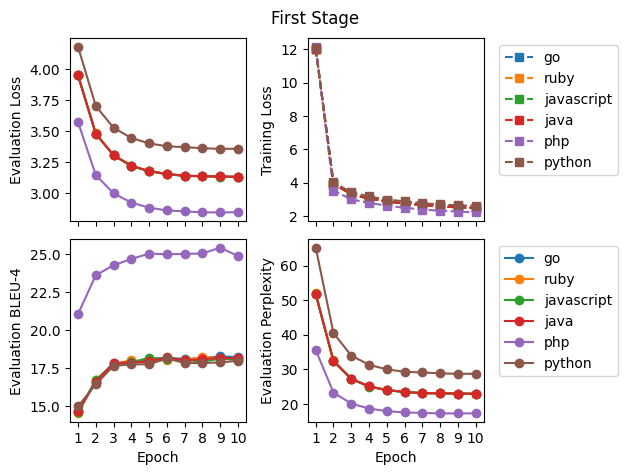

In [41]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1, ylabel='Evaluation Loss', xticks=range(1,11))
ax2 = fig.add_subplot(2, 2, 2, sharex=ax1, ylabel='Training Loss')
ax3 = fig.add_subplot(2, 2, 3, sharex=ax1, ylabel='Evaluation BLEU-4', xlabel='Epoch')
ax4 = fig.add_subplot(2, 2, 4, sharex=ax1, ylabel='Evaluation Perplexity', xlabel='Epoch')
for column_index in range(1, 18, 3):
    eval_loss_column = eval_loss_df.columns[column_index]
    train_loss_column = train_loss_df.columns[column_index]
    train_loss_serie = train_loss_df[train_loss_column].dropna()
    train_loss_step = math.ceil(len(train_loss_serie)/10)

    ax1.plot(range(1,11), eval_loss_df[eval_loss_column].dropna().values, label=eval_loss_column.split('-')[0], marker='o',)
    plt.setp(ax1.get_xticklabels(), visible=False)

    ax2.plot(range(1,11), train_loss_serie[train_loss_serie.index[::train_loss_step]].values, label=train_loss_column.split('-')[0], linestyle='dashed', marker="s")
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.setp(ax2.get_xticklabels(), visible=False)

    ax3.plot(range(1,11), eval_blue[eval_blue.columns[column_index]].dropna().values, label=eval_blue.columns[column_index].split('-')[0], marker='o',)
    
    ax4.plot(range(1,11), eval_ppl[eval_ppl.columns[column_index]].dropna().values, label=eval_ppl.columns[column_index].split('-')[0], marker='o',)
    ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
fig.subplots_adjust(top=0.92)
fig.suptitle("First Stage")
plt.show()